<a href="https://colab.research.google.com/github/pab10dm/pab10dm/blob/main/RcolabRLC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

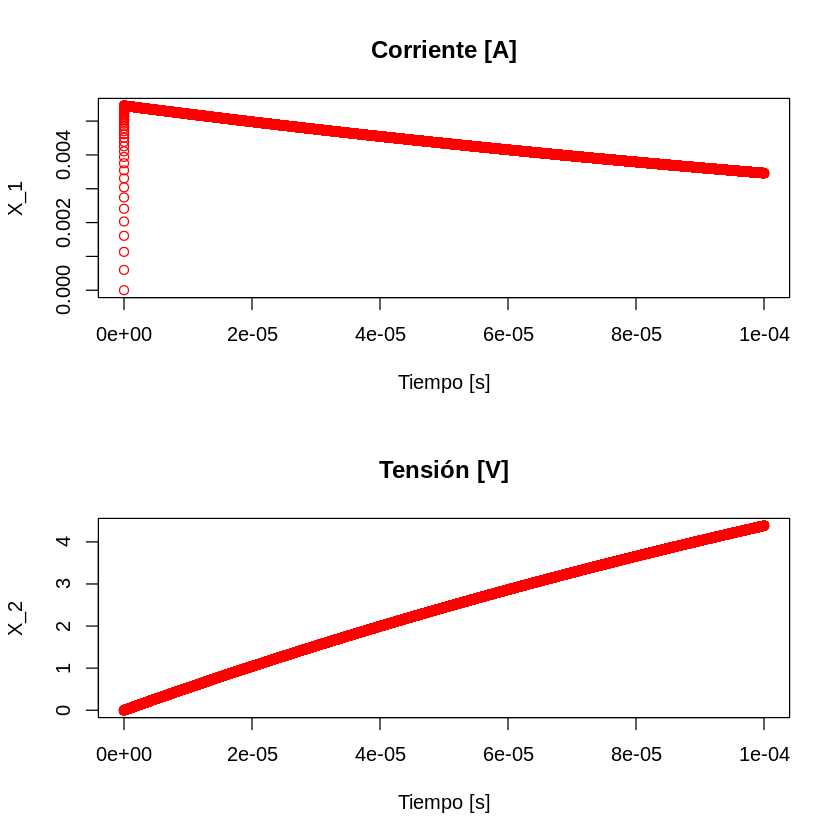

In [1]:
#https://colab.research.google.com/?authuser=1#create=true&language=r
#La linea superior crea el Notebook, el authuser=1 indica el usuario del Chrome, en mi caso, 0 es gmail y 1 es UNC.edu.ar
#R.version.string
#print(installed.packages())
#https://www.datacamp.com/community/tutorials/tutorial-on-loops-in-r
#https://www.datacamp.com/community/tutorials/functions-in-r-a-tutorial
#$ cd "C:\Users\LIMAC\Usr_Julian\HDMIO\Enebro\Usr_Julian\FCEFyN UNC\Extension\2022 01\M1" #No son necesarios en Colab
#$ R #No son necesarios en Colab
#rm(list=ls(all=TRUE)) #es BORRAR todo #No son necesarios en Colab
#clear;%close all;
#X=[0; 0];
X <- numeric(2)
dim(X) <- c(2,1)
ii=0;t_etapa=1e-9
tF=1e-4;
Ts=t_etapa;
T=100e-5; At=5e-10; 
Kmax=(T/At); #fix() No es necesario en Colab
#t=linspace(0,T,Kmax);
R=2.2e3;L=10e-6;C=100e-9;vin=12;
#e=zeros(round(tF/t_etapa),1);
#e <- numeric(tF/t_etapa)
#dim(e) <- c(tF/t_etapa,1)
TL=1.15e-4;u=12;
#% x1(1)=X(1);%corriente
x1 <- numeric(tF/t_etapa)
dim(x1) <- c(tF/t_etapa,1)
x2 <- numeric(tF/t_etapa)
dim(x2) <- c(tF/t_etapa,1)
acc <- numeric(tF/t_etapa)
dim(acc) <- c(tF/t_etapa,1)
# A=[-R/L -1/L ; 1/C  0]; 
A<-c(-R/L,-1/L, 1/C, 0)
dim(A) <- c(2,2)#print(A)
A<-t(A) #traspongo para mantener igualdad con Matlab
# B=[1/L; 0];
B<-c(1/L, 0)
dim(B) <- c(2,1)
#% x2(2)=X(2);%tensión en el capacitor
#for t=0:t_etapa:tF
for(i in 0:(tF/At)) {
    ii=ii+1
    x1[ii]<-X[1] #;%corriente
    x2[ii]<-X[2] #;%tensión en el capacitor
#    X=modrlc(t_etapa, X, u);
#y %*% z A %*% X+B %*% u
    xp=A%*% X+B%*% u;
    X=X+xp*At;
    acc[ii]<-u;
#end
}
t1<-seq(0,tF,At)  #seq(from, to, by= )
#para imprimir la imágen, sino es muy grande el archivo
#Acá hay que volver a asignar el directorio donde se almacena la imagen
#png(file="C:/Users/LIMAC/Usr_Julian/HDMIO/Enebro/Usr_Julian/FCEFyN UNC/Extension/2021 01/Imag_R_plot.png", width=1920, height=1080)
par(mfrow=c(2,1))
plot(t1,x1,  main="Corriente [A]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="X_1")
plot(t1,x2,  main="Tensión [V]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="X_2")
#print(t1)
#print(x1)
#dev.off() #Acá termina de imprimir